<a href="https://colab.research.google.com/github/vzorspb/DE_Sprint/blob/main/Task_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сгенерировать выборку с распределением Рэлэя

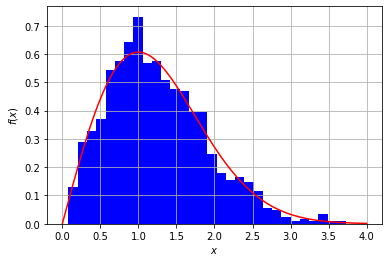

In [111]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import rayleigh as ray, norm 
loc = 0
scale = 1
rv = ray(loc=loc, scale=scale)
r = rv.rvs(size=1000)
a = np.linspace(0, 4, 1000)
pdf = rv.pdf(a)
fig = plt.figure()
ax = fig.add_axes()
plt.hist(r, bins=30, color='blue', density=True)
plt.plot(a, pdf, color='red')
plt.ylabel('$ f(x) $')
plt.xlabel('$ x $')
grid = plt.grid(True)  


График

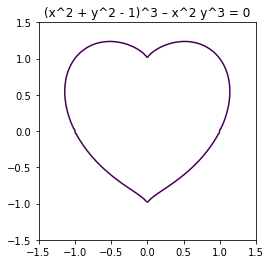

In [136]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace( -1.5 , 1.5 , 150 )
y = np.linspace( -1.5 , 1.5 , 150 )
 
a, b = np.meshgrid( x , y )
 
C = (a ** 2 + b ** 2 - 1)**3-a**2*b**3
 
figure, axes = plt.subplots()
 
axes.contour( a , b , C , [0] )
axes.set_aspect( 1 )
 
plt.title( '(x^2 + y^2 - 1)^3 – x^2 y^3 = 0' )
plt.show()

Поиск закономерностей

In [2]:
import numpy as np
from scipy import cluster

dataset = []
with open('/content/dataset_home.txt', mode='r') as file:
  for line in file:
    splited_line=line.split(',')
    splited_line[0]=float(splited_line[0])
    splited_line[2]=float(splited_line[2])
    splited_line[6]=float(splited_line[6])
    splited_line[3]=float(splited_line[3])
    if splited_line[1] == 'female':
      splited_line[1]=float(0)
    else:
      splited_line[1]=float(1)
    if splited_line[4] == 'no':
      splited_line[4]=float(0)
    else:
      splited_line[4]=float(1)
    if splited_line[5] == 'northwest':
      splited_line[5]=float(0)
    elif splited_line[5] == 'northeast':
      splited_line[5]=float(1)
    elif splited_line[5] == 'southeast':
      splited_line[5]=float(3)
    elif splited_line[5] == 'southwest':
      splited_line[5]=float(4)
    dataset.append (splited_line)
arr=np.array (dataset).T


Text(0.5, 0, 'Стоимость страховки')

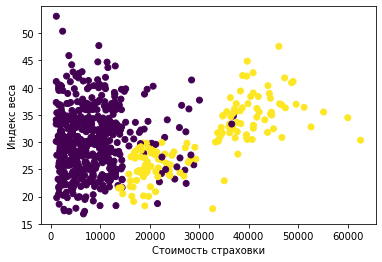

In [148]:
import matplotlib.pyplot as plt

plt.scatter(arr[6],arr[2],c=arr[4])
plt.ylabel('Индекс веса')
plt.xlabel('Стоимость страховки')


У курящих страховка дороже (желтые)

Text(0.5, 0, 'Стоимость страховки')

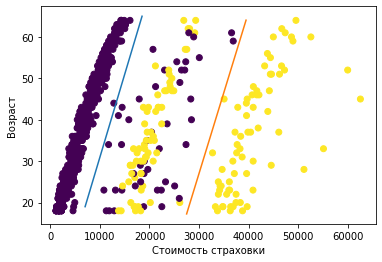

In [149]:
plt.scatter(arr[6],arr[0],c=arr[4])
x=np.arange(7000,18500)
y=x*0.004-9
plt.plot(x,y)
x=np.arange(27500,39500)
y=x*0.0039-90
plt.plot(x,y)
type1 = []
type2 = []
type3 = []
for line in dataset:
  if line[0]>line[6]*0.004-9:
    type1.append(line)
  elif line[0]<line[6]*0.0039-90:
    type3.append(line)
  else:
    type2.append(line)
arr_type1=np.array (type1).T
arr_type2=np.array (type2).T
arr_type3=np.array (type3).T
plt.ylabel('Возраст')
plt.xlabel('Стоимость страховки')

Text(0.5, 0, 'Стоимость страховки log')

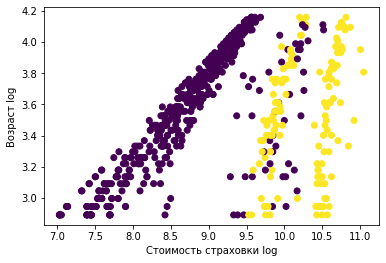

In [150]:
plt.scatter(np.log(arr[6]),np.log(arr[0]),c=arr[4])
plt.ylabel('Возраст log')
plt.xlabel('Стоимость страховки log')

Делим датасет на 3 группы. Первая группа - не куря. 2-я группа - курят и имеют индекс массы ниже среднего.3-я группа - курят и имеют массу выше среднего.

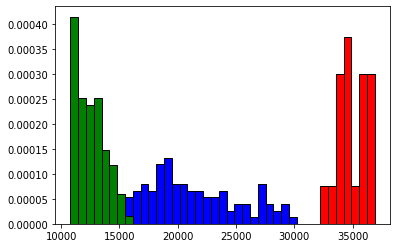

In [135]:
i=6
min = arr_type2[i].min()
max = arr_type2[i].max()
plt.hist(arr_type2[i], np.linspace(min,max,40), edgecolor = "black", color='blue', density=True)
plt.hist(arr_type3[i], np.linspace(min,max,40), edgecolor = "black", color='red', density=True)
plt.hist(arr_type1[i], np.linspace(min,max,40), edgecolor = "black", color='green', density=True)
plt.show()